# Face Detection - using OpenCV Haar Cascade Classifier 

Using Python 3 and Anaconda, implement face detection and localization with OpenCV Haar Cascade Classifier.

## Requirement

1. Install OpenCV by using Anaconda. (conda install -c conda-forge opencv)

2. Download Haar module (haarcascade_frontalface_alt2.xml) from [the github of OpenCV](https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt2.xml)

## File Path 

OpenCV_face_detection  
├── opencv_haar_cascade_classifier.ipynb  
├── model  
........└── cv2  
..............└── haarcascade_frontalface_alt2.xml    
└── data  
........├── images             (  folder for testing images  )   
........└── videos             (  folder for testing videos  )

## Step 1 

Import the related packages.

In [1]:
# packages for Utilities
import os
import sys
import random
from tqdm import tqdm

# packages for image
import cv2
import matplotlib.pyplot as plt

Set the parameters.

In [2]:
# root directory of the project
ROOT_DIR = os.getcwd()

# path of data
DATA_PATH = os.path.join(ROOT_DIR, "data")

# path of testing-image folder
TEST_IMGS_PATH = os.path.join(DATA_PATH, "images")

# path of haar model
MODEL_PATH = os.path.join(ROOT_DIR, "model")

# path of OpenCV Haar model
CV2_MODEL_PATH = os.path.join(MODEL_PATH, "cv2")

# haarcascade_frontalface_alt2.xml
HAAR_WEIGHT_FILE = os.path.join(CV2_MODEL_PATH, "haarcascade_frontalface_alt2.xml")

## Step 2 

Use "cv2.CascadeClassifier" to detect faces.

In [3]:
facesDetector = cv2.CascadeClassifier(HAAR_WEIGHT_FILE)

In [4]:
#path of testing images
test_image= os.path.join(TEST_IMGS_PATH, "bean.jpeg")

In [5]:
# using OpenCV to load the testing image

# NOTE: 
#      Using OpenCV to load images, the format of Numpy Ndaary is BGR (B:Blue, G: Green, R: Red) 
#      The order of channels is different from the format of PIL or skimage (RGB) 
bgr_image = cv2.imread(test_image) 

# convert BGR image to gray-level image
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

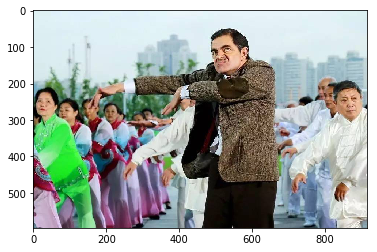

In [6]:
# show the original image
# the format of "imshow" of Matplotlib is RGB, so we need to change BGR to RGB
plt.imshow(bgr_image[:,:,::-1]) 
plt.show()

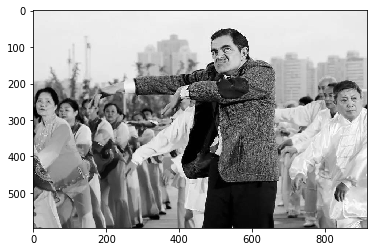

In [7]:
# show the gray-level image
plt.imshow(gray_image, cmap='gray')
plt.show()

With OpenCV, we use "detectMultiScale" function to detect human faces. It can detects objects of different sizes in the input image, and the detected objects are returned as a list of rectangles.

cv2.HaarDetectObjects(image, cascade, storage, scale_factor=1.1, min_neighbors=3, flags=0, min_size=(0, 0)) → detectedObjects


"""  
Parameters:	

cascade – Haar classifier cascade (OpenCV 1.x API only). It can be loaded from XML or YAML file using Load(). When the cascade is not needed anymore, release it using cvReleaseHaarClassifierCascade(&cascade).

image – Matrix of the type CV_8U containing an image where objects are detected.

objects – Vector of rectangles where each rectangle contains the detected object.

scaleFactor – Parameter specifying how much the image size is reduced at each image scale.

minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

flags – Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.

minSize – Minimum possible object size. Objects smaller than that are ignored.

maxSize – Maximum possible object size. Objects larger than that are ignored.  
"""

In [8]:
# detectMultiScale can detect objects of different sizes in the input image
#  and the detected objects are returned as a list of rectangles.
faces = facesDetector.detectMultiScale(gray_image,1.3, 5)

# the format of the result is (x, y, w, h) 
#  the coordinate of upper left corner: (x,y)
#  the width and height of the rectangle: (w, h)
print("Faces detected: ", len(faces))
print("Result data shape: ",faces.shape)
print("1st data: ", faces[0])

Faces detected:  4
Result data shape:  (4, 4)
1st data:  [827 216  76  76]


Show the result with the image

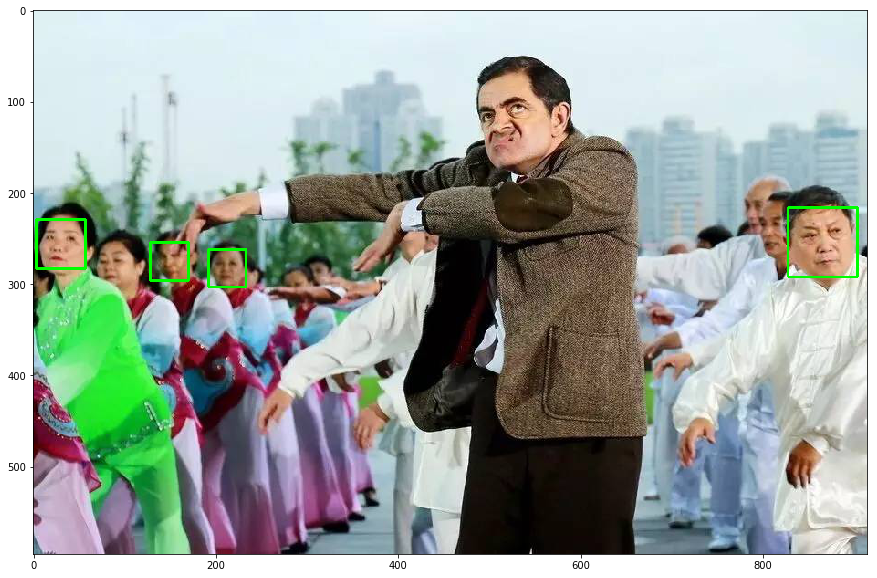

In [9]:
# using for loop for the parameters of all detected faces (x, y, w, h)
for (x, y, w, h) in faces:
    # using OpenCV to mark the boundary of the rextangles
    # parameters:
    #     the image
    #     the coordinate of upper left corner  (x, y)
    #     the coordinate of lower right corner (x, y)
    #     the color of the boundary (r,g,b)
    #     the width of the boundary (int)
    cv2.rectangle(bgr_image, (x,y), (x+w, y+h), (0,255,0), 2)

# show the result
plt.figure(figsize=(20,10))
plt.imshow(bgr_image[:,:,::-1])
plt.show()

Detect faces in videos

In [10]:
# the path of the testing-video folder
TEST_VIDEOS_PATH = os.path.join(DATA_PATH, "videos")

# choose the detected video 
# We download the video from youtube: https://www.youtube.com/watch?v=aN862xUWt5I
video_inp =  os.path.join(TEST_VIDEOS_PATH, "dance.mp4")

# the video after face dection
video_out =  os.path.join(TEST_VIDEOS_PATH, "dance_haar.mp4")

# use OpenCV to capture video
video_reader = cv2.VideoCapture(video_inp)

# the imformation of the video
nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT)) # number of frames
frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))  # height of each frame
frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))   # width of each frame

# check OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

# check video fps(frame per seconds)
if int(major_ver)  < 3 :
    fps = video_reader.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video_reader.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
        
# set the output video
video_writer = cv2.VideoWriter(video_out,
                               cv2.VideoWriter_fourcc(*'XVID'), 
                               fps, # output fps
                               (frame_w, frame_h))
# the number of detected faces
total_faces_detected = 0

# using for loop for face detection of each frame
for i in tqdm(range(nb_frames)):
    ret, bgr_image = video_reader.read() # read one frame
    
    # convert BGR image to gray-level image
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    
    # face detection
    faces = facesDetector.detectMultiScale(gray_image,1.3, 5)
    
    # add the number of detected faces in this frame to the number of total detected faces in the video
    total_faces_detected += len(faces) 
    
    # mark the boundaries of the detected faces in this frame
    for (x, y, w, h) in faces:
        # use OpenCV to mark the boundary of detected face      
        cv2.rectangle(bgr_image, (x,y), (x+w, y+h), (0,255,0), 2)
        
    # use OpenCV to show the result
    video_writer.write(bgr_image)
    
video_reader.release() # release resources
video_writer.release() # release resources

Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.97002997002997


100%|██████████████████████████████████████████████████████████████████████████████| 5263/5263 [06:40<00:00, 13.14it/s]


In [11]:
print("Total faces detected: ", total_faces_detected)

Total faces detected:  8451


Show the video after face detection.  
I upload the video to Youtube, and now insert the video from Youtube.

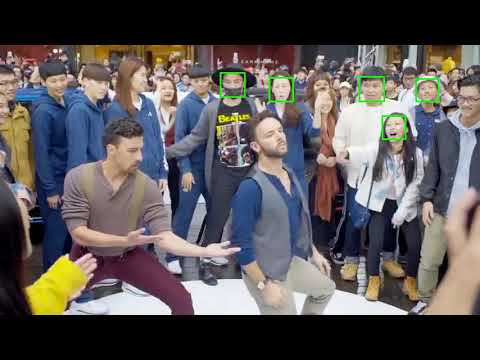

In [1]:
#show the video from Youtube
from IPython.lib.display import YouTubeVideo
YouTubeVideo('_DeVIL5tDqU')

The link of the result video is as the following.  
[result video](https://youtu.be/_DeVIL5tDqU)